In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/housing_cleaned.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [7]:
print("Shape: ", df.shape)

Shape:  (545, 13)


In [14]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']
for col in binary_cols:
    df[col] = df[col].str.lower().map(
        {
            'yes': 1,
            'no': 0
        }
    )
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [15]:
X = df.drop('price', axis=1)
y = df['price']

In [16]:
print("X-shape: ", X.shape)
print("y-shape: ", y.shape)

X-shape:  (545, 11)
y-shape:  (545,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 11)
(109, 11)
(436,)
(109,)


In [18]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [21]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(109,)


In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [23]:
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error: 1414718.78
R² Score: 0.6040


In [24]:
importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

In [25]:
print(importances)
print(features)
print(sorted_idx)

[0.48638819 0.04966789 0.15744122 0.06060439 0.0119245  0.01847811
 0.03768078 0.02130014 0.06210012 0.06201747 0.03239719]
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')
[ 0  2  8  9  3  1  6 10  7  5  4]


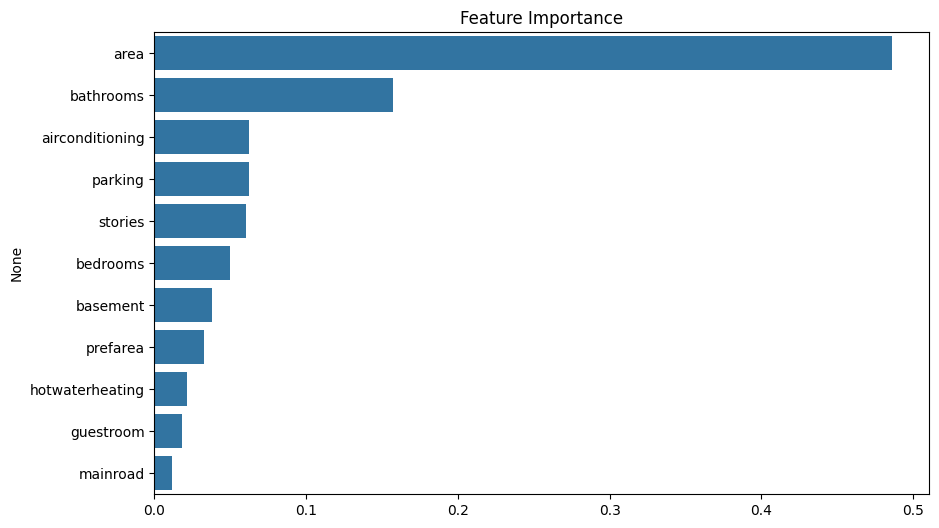

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance")
plt.show()

In [28]:
joblib.dump(model, '../models/final_model.pkl')
print("Model saved to models/final_model.pkl")

Model saved to models/final_model.pkl
